In [1]:
#import pakages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
#from nltk.corpus import stopwords
import tensorflow as tf
from transformers import *
###Insipred from CHRIS DEOTTE

In [2]:
train = pd.read_csv('../input/feedback-prize-2021/train.csv')
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [3]:
raw_text_files = os.listdir('/kaggle/input/feedback-prize-2021/train')
print(f'Training data consists of {len(raw_text_files)} texts')
print(f'Training data consists of {train.shape[0]} annotaions')
print(f'Each essay contains average {round(train.shape[0]/len(raw_text_files), 1)} annotaions.')

Training data consists of 15594 texts
Training data consists of 144293 annotaions
Each essay contains average 9.3 annotaions.


In [4]:
with open('../input/feedback-prize-2021/train/423A1CA112E2.txt', 'r') as file:
    first_txt = file.read()
print(first_txt)

Phones

Modern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.

When people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.

Driving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to remember. S

In [5]:
train[train['id'] == "423A1CA112E2"]

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
5,423A1CA112E2,1.622628e+12,887.0,1150.0,That's why there's a thing that's called no te...,Evidence,Evidence 3,163 164 165 166 167 168 169 170 171 172 173 17...
6,423A1CA112E2,1.622628e+12,1151.0,1533.0,Sometimes on the news there is either an accid...,Evidence,Evidence 4,211 212 213 214 215 216 217 218 219 220 221 22...
7,423A1CA112E2,1.622628e+12,1534.0,1602.0,Phones are fine to use and it's also the best ...,Claim,Claim 2,282 283 284 285 286 287 288 289 290 291 292 29...
8,423A1CA112E2,1.622628e+12,1603.0,1890.0,If you go through a problem and you can't find...,Evidence,Evidence 5,297 298 299 300 301 302 303 304 305 306 307 30...
9,423A1CA112E2,1.622628e+12,1891.0,2027.0,The news always updated when people do somethi...,Concluding Statement,Concluding Statement 1,355 356 357 358 359 360 361 362 363 364 365 36...


In [6]:
text_df = pd.DataFrame(columns = ['id', 'text'])

In [7]:
%%time
texts = []
for file in raw_text_files:
    with open(f'/kaggle/input/feedback-prize-2021/train/{file}') as f:
        texts.append({'id': file[:-4], 'text': f.read()})
        #text_df.append(pd.Series({'id': file[:-4], 'text': f.read()}), ignore_index = True)
texts_df = pd.DataFrame(texts)

CPU times: user 2.59 s, sys: 2.45 s, total: 5.04 s
Wall time: 52.7 s


In [8]:
texts_df.head()

,id,text
0,62C57C524CD2,I think we should be able to play in a sport i...
1,80667AD3FFD8,Some schools require summer projects for stude...
2,21868C40B94F,Driverless cars have been argued and talked ab...
3,87A6EF3113C6,"The author of ""The Challenge of Exploring Venu..."
4,24687D08CFDA,"Wow, from the mar really look like humans face..."


In [9]:
#count the number of character and number of word of each essay
texts_df['len'] = texts_df['text'].apply(len)
texts_df['word_num'] = texts_df['text'].apply(lambda x: len(x.split()))

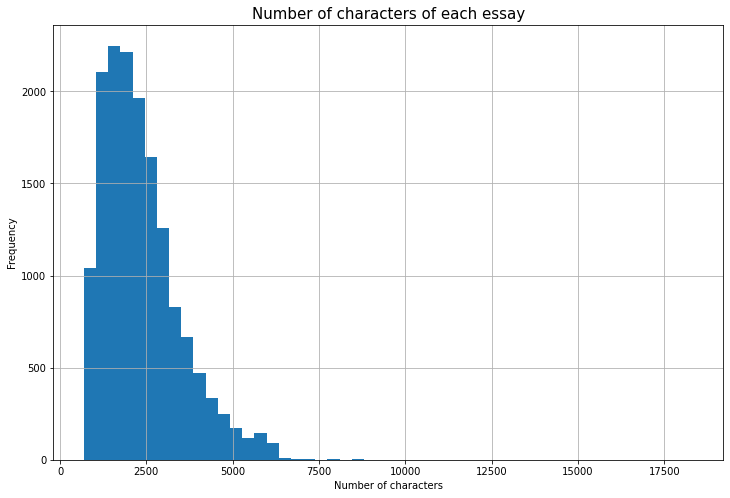

In [10]:
texts_df['len'].hist(bins = 50, figsize = (12, 8))
plt.title('Number of characters of each essay', fontsize = 15)
plt.xlabel('Number of characters')
plt.ylabel('Frequency');